In [1]:
## Data Exploration 
### Using kagglehub to download datasets from Kaggle

In [1]:
# Import necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import kagglehub

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Check if dataset already exists
dataset_path = "C:\\Users\\chrisb\\Desktop\\EMTS\\MedML\\dataset\\images"
if not os.path.exists(dataset_path):
    print("Dataset not found locally. Downloading...")
    path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
    print("Path to dataset files:", path)
else:
    print("Dataset already exists locally at:", os.path.abspath(dataset_path))
    path = os.path.abspath(dataset_path)

Dataset already exists locally at: C:\Users\chrisb\Desktop\EMTS\MedML\dataset\images


In [3]:
# Dataset Description 
"""
The HAM10000 ("Human Against Machine with 10000 training images") dataset is a large
collection of multi-source dermatoscopic images of common pigmented skin lesions.
It is intended to serve as a benchmark for machine learning algorithms. The dataset
contains 10,015 dermatoscopic images which are categorized into seven different classes
of skin lesions, including both benign and malignant types.
The dataset is publicly available on Kaggle and can be accessed at:
https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
"""

'\nThe HAM10000 ("Human Against Machine with 10000 training images") dataset is a large\ncollection of multi-source dermatoscopic images of common pigmented skin lesions.\nIt is intended to serve as a benchmark for machine learning algorithms. The dataset\ncontains 10,015 dermatoscopic images which are categorized into seven different classes\nof skin lesions, including both benign and malignant types.\nThe dataset is publicly available on Kaggle and can be accessed at:\nhttps://www.kaggle.com/kmader/skin-cancer-mnist-ham10000\n'

In [4]:
# List files in the dataset directory
print("Files in dataset directory:")
for file in os.listdir(path):
    print(file)

Files in dataset directory:
akiec
bcc
bkl
df
mel
nv
vasc


In [5]:
# Dict for lesion types
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# boolean mapping for benign/malignant lesions (1 = malignant, 0 = benign)

is_malignant = {
    'nv': 0,
    'mel': 1,
    'bkl': 0,
    'bcc': 1,
    'akiec': 1,
    'vasc': 0,
    'df': 0
}

In [6]:
# Load the metadata dataset
df = pd.read_csv(os.path.join(path, "C:\\Users\\chrisb\\Desktop\\EMTS\\MedML\\dataset\\HAM10000_metadata.csv"))
# Basic information about the dataset
print("=== DATASET BASIC INFO ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

=== DATASET BASIC INFO ===
Number of rows: 10015
Number of columns: 7
Memory usage: 3.32 MB


In [7]:
# Check for missing values
print("\n=== MISSING VALUES ===")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"Duplicate lesion_ids: {df['lesion_id'].duplicated().sum()}")

# Basic statistics
print("\n=== BASIC STATISTICS ===")
print(df.describe(include='all'))


=== MISSING VALUES ===
age    57
dtype: int64

Duplicate rows: 0
Duplicate lesion_ids: 2545

=== BASIC STATISTICS ===
          lesion_id      image_id     dx dx_type          age    sex  \
count         10015         10015  10015   10015  9958.000000  10015   
unique         7470         10015      7       4          NaN      3   
top     HAM_0003789  ISIC_0027419     nv   histo          NaN   male   
freq              6             1   6705    5340          NaN   5406   
mean            NaN           NaN    NaN     NaN    51.863828    NaN   
std             NaN           NaN    NaN     NaN    16.968614    NaN   
min             NaN           NaN    NaN     NaN     0.000000    NaN   
25%             NaN           NaN    NaN     NaN    40.000000    NaN   
50%             NaN           NaN    NaN     NaN    50.000000    NaN   
75%             NaN           NaN    NaN     NaN    65.000000    NaN   
max             NaN           NaN    NaN     NaN    85.000000    NaN   

       localizat


=== CLASS DISTRIBUTION ===
Raw counts:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

Percentages:
dx
nv       66.949576
mel      11.113330
bkl      10.973540
bcc       5.132302
akiec     3.265102
vasc      1.417873
df        1.148278
Name: proportion, dtype: float64


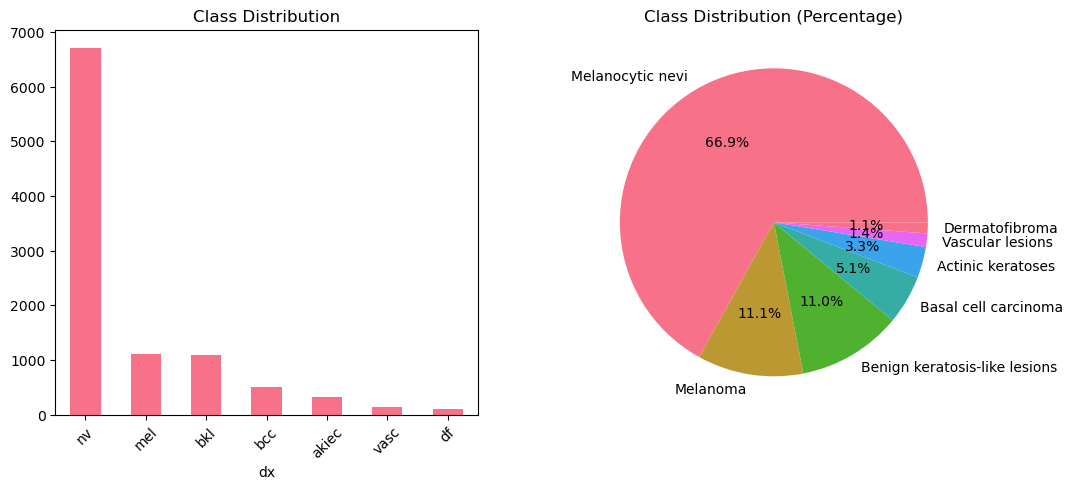

In [8]:
# Analyze target variable distribution
print("\n=== CLASS DISTRIBUTION ===")
class_counts = df['dx'].value_counts()
print("Raw counts:")
print(class_counts)

print("\nPercentages:")
print(df['dx'].value_counts(normalize=True) * 100)

# Visualize class imbalance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Map to full names for better visualization
full_names = [lesion_type_dict[x] for x in class_counts.index]
plt.pie(class_counts.values, labels=full_names, autopct='%1.1f%%')
plt.title('Class Distribution (Percentage)')
plt.show()


=== DEMOGRAPHIC ANALYSIS ===
Age distribution:
count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

Sex distribution:
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

Localization distribution:
localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64


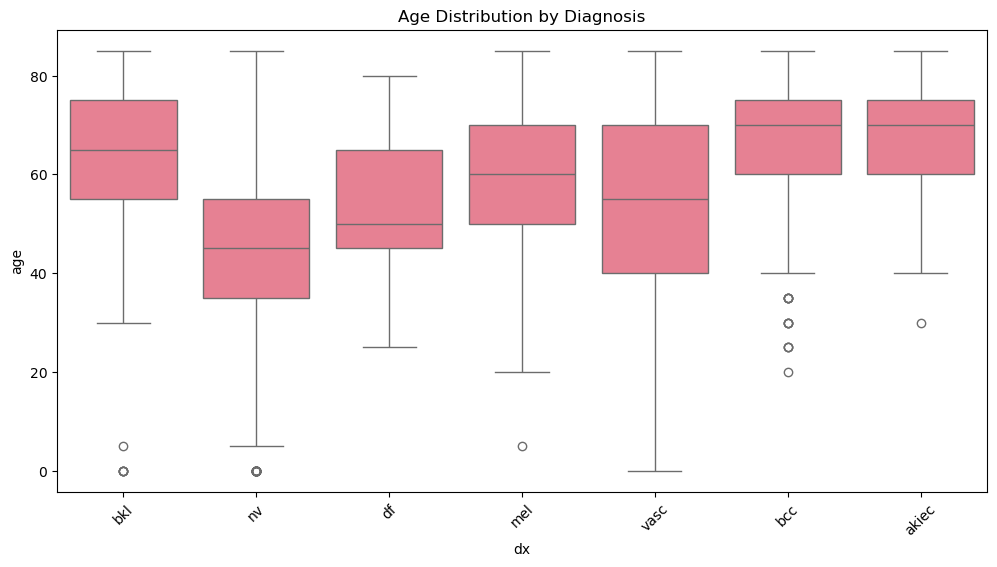

In [9]:
# Analyze demographic features
print("\n=== DEMOGRAPHIC ANALYSIS ===")
print("Age distribution:")
print(df['age'].describe())

print("\nSex distribution:")
print(df['sex'].value_counts(dropna=False))

print("\nLocalization distribution:")
print(df['localization'].value_counts())

# Age distribution by diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='dx', y='age')
plt.title('Age Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Check image availability
print("\n=== IMAGE DATA ASSESSMENT ===")

image_path = "C:\\Users\\chrisb\\Desktop\\EMTS\\MedML\\dataset\\images"
print(f"Image directory: {image_path}")

# Count actual image files in the images directory
if os.path.exists(image_path):
    img_files = [f for f in os.listdir(image_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    total_images = len(img_files)
    print(f"Total images found: {total_images}")
    
    # Sample some filenames
    print(f"Sample image files: {img_files[:5]}")
else:
    print(f"Image directory not found: {image_path}")
    total_images = 0

print(f"Metadata rows: {len(df)}")
print(f"Match: {total_images == len(df)}")


=== IMAGE DATA ASSESSMENT ===
Image directory: C:\Users\chrisb\Desktop\EMTS\MedML\dataset\images
Total images found: 0
Sample image files: []
Metadata rows: 10015
Match: False


In [11]:
# Check for potential data quality issues
print("\n=== DATA QUALITY CHECKS ===")

# Age outliers
age_outliers = df[(df['age'] < 0) | (df['age'] > 100)]
print(f"Age outliers: {len(age_outliers)}")

# Missing critical information
print(f"Missing age: {df['age'].isnull().sum()}")
print(f"Missing sex: {df['sex'].isnull().sum()}")
print(f"Missing localization: {df['localization'].isnull().sum()}")

# Check for data consistency
print(f"Unique lesion_ids: {df['lesion_id'].nunique()}")
print(f"Unique image_ids: {df['image_id'].nunique()}")


=== DATA QUALITY CHECKS ===
Age outliers: 0
Missing age: 57
Missing sex: 0
Missing localization: 0
Unique lesion_ids: 7470
Unique image_ids: 10015
